purpose: run PCA analysis NICSA traits that Hao Chen recommended for parallels for smoking initiation and cigarettes per day

# set-up

In [1]:
import os
import pandas as pd
from pca import pca
import matplotlib.pyplot as plt

In [2]:
os.chdir('/tscc/projects/ps-palmer/brittany/SUD_cross_species/')

In [3]:
nicsa_traits=pd.read_csv('scripts/nicsa_traits.csv',sep=',')

In [4]:
phenopath='nicsa_gwas/data/pheno/'

In [5]:
pheno=pd.read_csv('allpheno.txt',sep='\t',header=None)

In [6]:
#N rats in combined file
len(pheno)

2018

In [7]:
if 'tbl_cigday' in locals(): 
    del(tbl_cigday)
if 'tbl_smkinit' in locals(): 
    del(tbl_smkinit)

In [8]:
for f in os.listdir(phenopath):
    if f.endswith('.txt'):
        label=(f[18: (len(f)-4)]) 
        #print(label)
        t=pd.read_csv(phenopath+f,sep=' ',header=None)
        if len(t.columns)==4:
            t=t[[1,2,3]]
        t.columns=['family','RFID',label]
        if (label in list(nicsa_traits[nicsa_traits.parallel=='cigday'].trait)):
            print(label +' in cigday')
            if 'tbl_cigday' in globals():
                tbl_cigday=tbl_cigday.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_cigday'+': '+str(len(tbl_cigday)))
            else:
                tbl_cigday=t[['RFID',label]]
        elif (label in list(nicsa_traits[nicsa_traits.parallel!='cigday'].trait)):
            print(label +' in smkinit')
            if 'tbl_smkinit' in globals():
                tbl_smkinit=tbl_smkinit.merge(t[['RFID',label]],on='RFID')
                print('# rats for '+f+': '+str(len(t)))
                print('# rats for tbl_smkinit'+': '+str(len(tbl_smkinit)))

            else:
                tbl_smkinit=t[['RFID',label]]
        else:
            print(label+' not in nicsa traits table')

day1_inactivelick not in nicsa traits table
day2_inactivelick not in nicsa traits table
day11_active_inactive_ratio not in nicsa traits table
first_three_days_infusion_median in smkinit
day7_infusion not in nicsa traits table
total_inactivelick_10days not in nicsa traits table
active_inactive_ratio_all_days in cigday
slope_nicotine_infusion not in nicsa traits table
day3_infusion not in nicsa traits table
day7_activelick not in nicsa traits table
day10_active_inactive_ratio in cigday
# rats for regressedlr_nicsa_day10_active_inactive_ratio.txt: 2018
# rats for tbl_cigday: 2018
day3_active_inactive_ratio not in nicsa traits table
day7_inactivelick not in nicsa traits table
day8_inactivelick not in nicsa traits table
day4_activelick not in nicsa traits table
day10_activelick in cigday
# rats for regressedlr_nicsa_day10_activelick.txt: 2018
# rats for tbl_cigday: 2018
day6_active_inactive_ratio not in nicsa traits table
day9_infusion not in nicsa traits table
first_three_days_infusion_tot

# PCA smkinit

In [9]:
len(tbl_smkinit)

2018

In [10]:
df=tbl_smkinit.dropna(axis='rows')

In [11]:
len(df)

1997

In [12]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [13]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_smkinit = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [97.36%] of the variance'}, xlabel='PC1 (69.6% expl.var)', ylabel='PC2 (13.2% expl.var)'>)

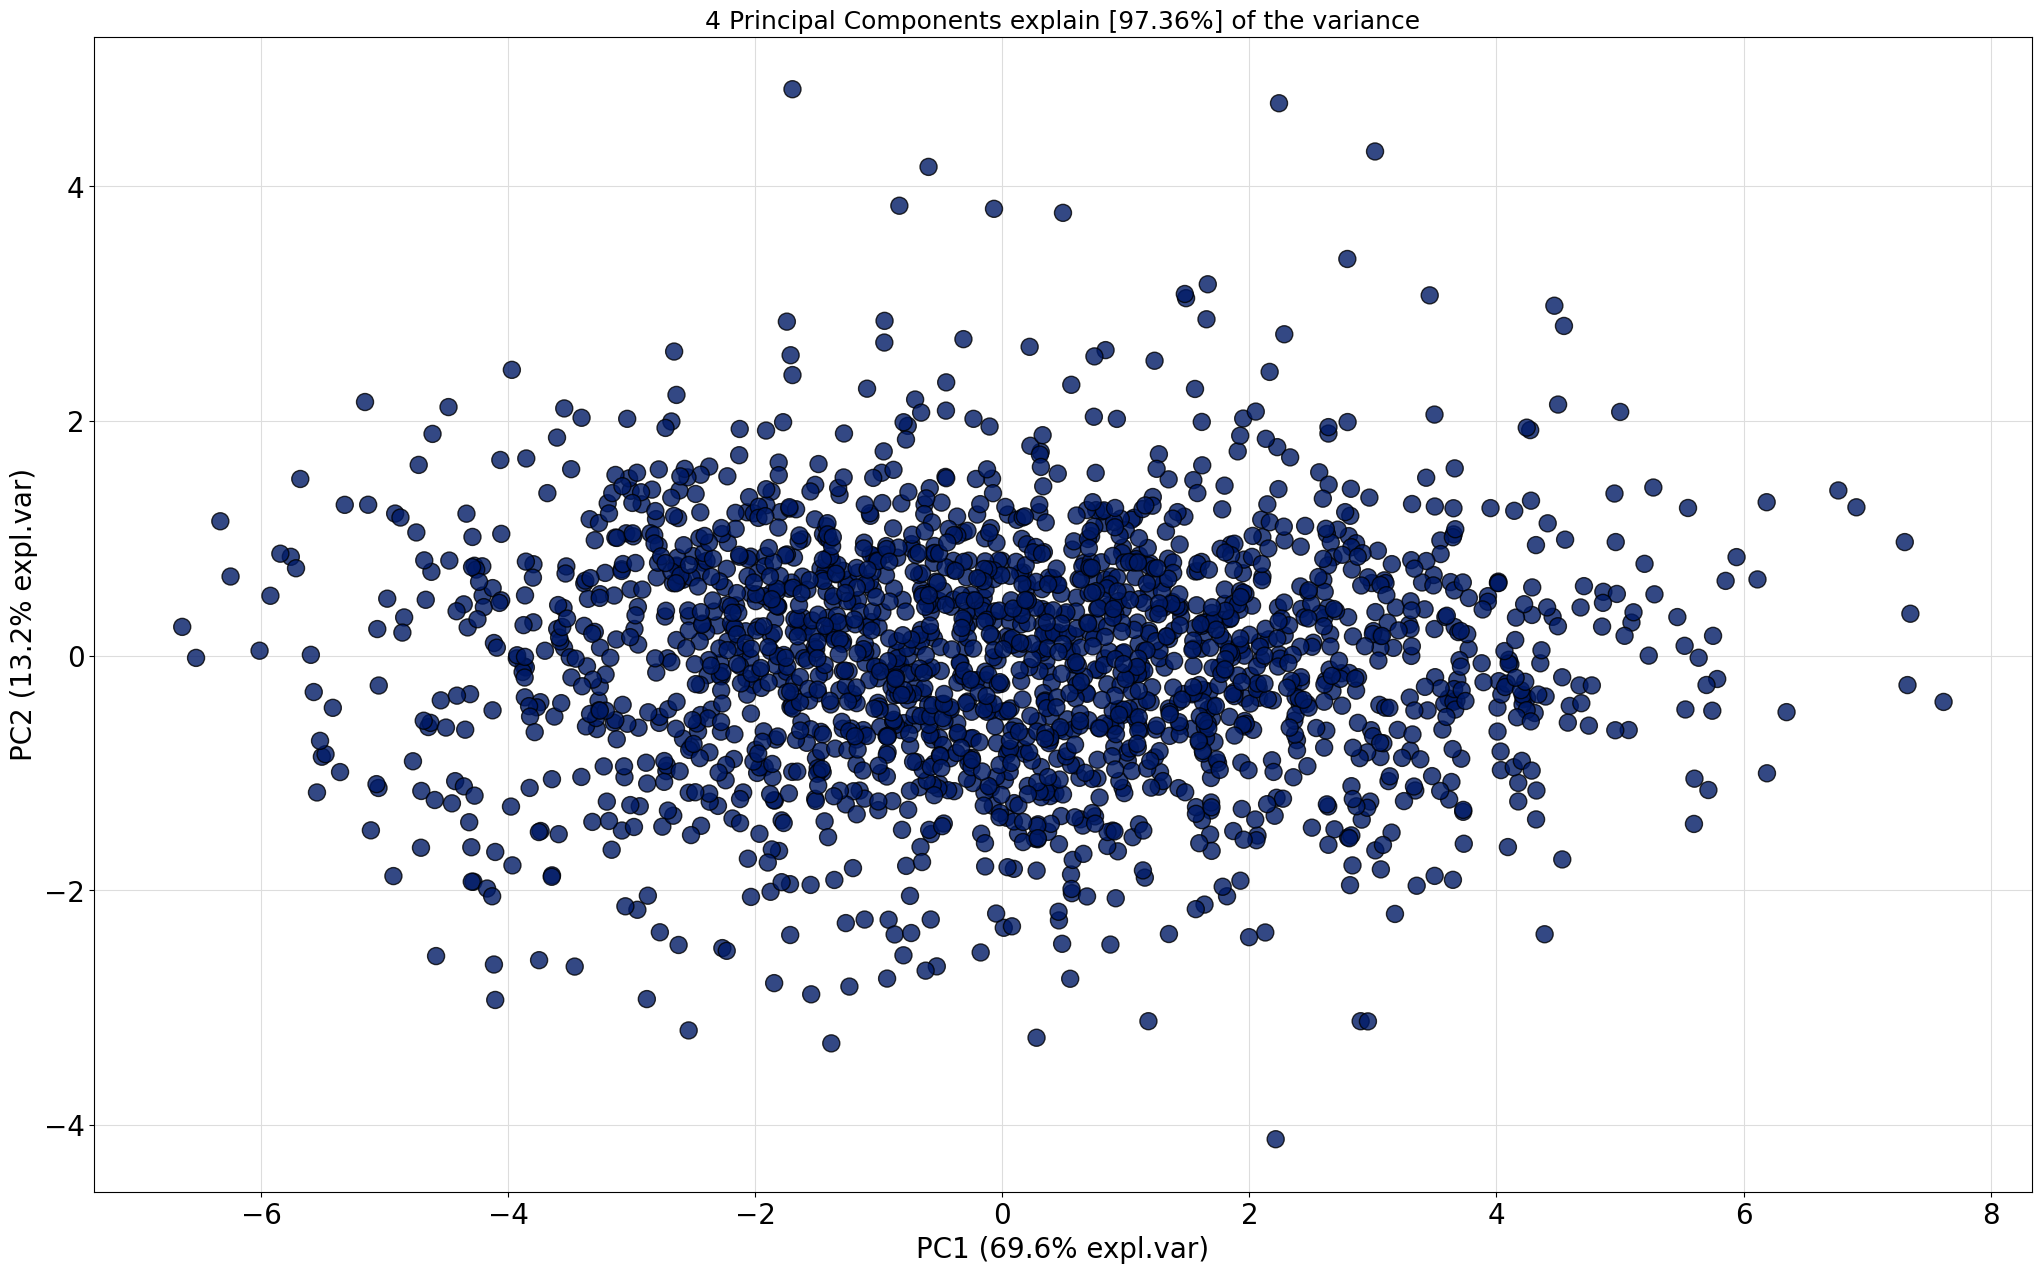

In [14]:
model.scatter()

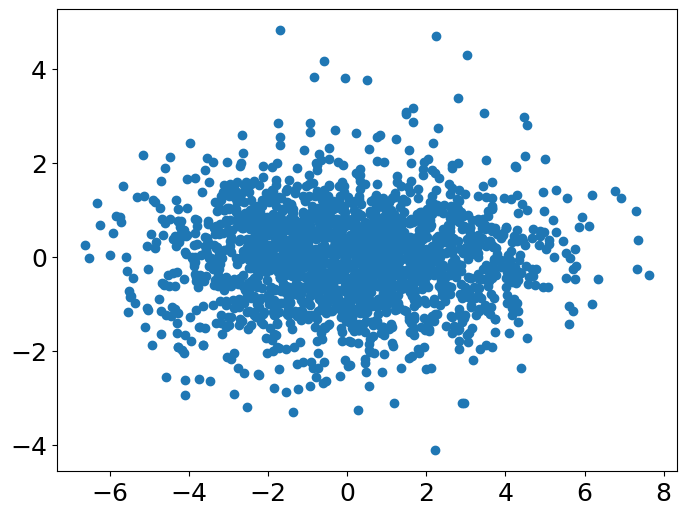

In [15]:
#confirm plot matches outputted data
plt.figure(figsize=(8,6))
plt.scatter(x=results_smkinit['PC']['PC1'],y=results_smkinit['PC']['PC2'])

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 4 Principal Components explain [97.36%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

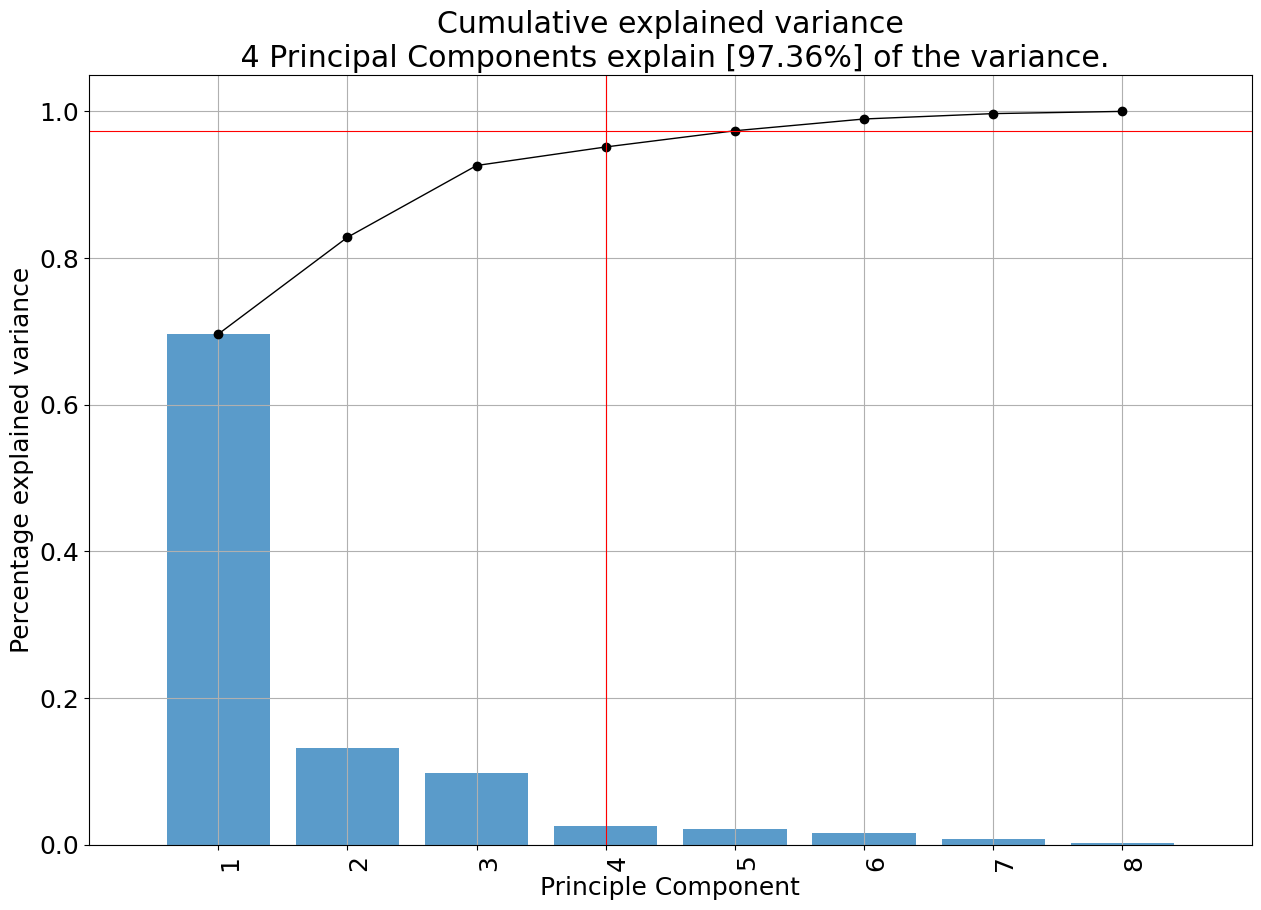

In [16]:
model.plot()

(array([ 19.,  89., 217., 384., 465., 402., 249., 131.,  34.,   7.]),
 array([-6.64109034, -5.21499442, -3.78889849, -2.36280257, -0.93670664,
         0.48938928,  1.91548521,  3.34158113,  4.76767706,  6.19377298,
         7.61986891]),
 <BarContainer object of 10 artists>)

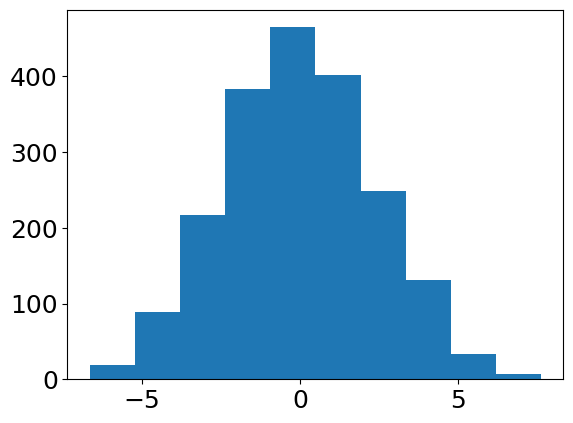

In [17]:
plt.hist(results_smkinit['PC']['PC1'])

# PCA cigday

In [18]:
len(tbl_cigday)

2018

In [19]:
df=tbl_cigday.dropna(axis='rows')

In [20]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [21]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_cigday = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [96.50%] of the variance'}, xlabel='PC1 (71.3% expl.var)', ylabel='PC2 (8.63% expl.var)'>)

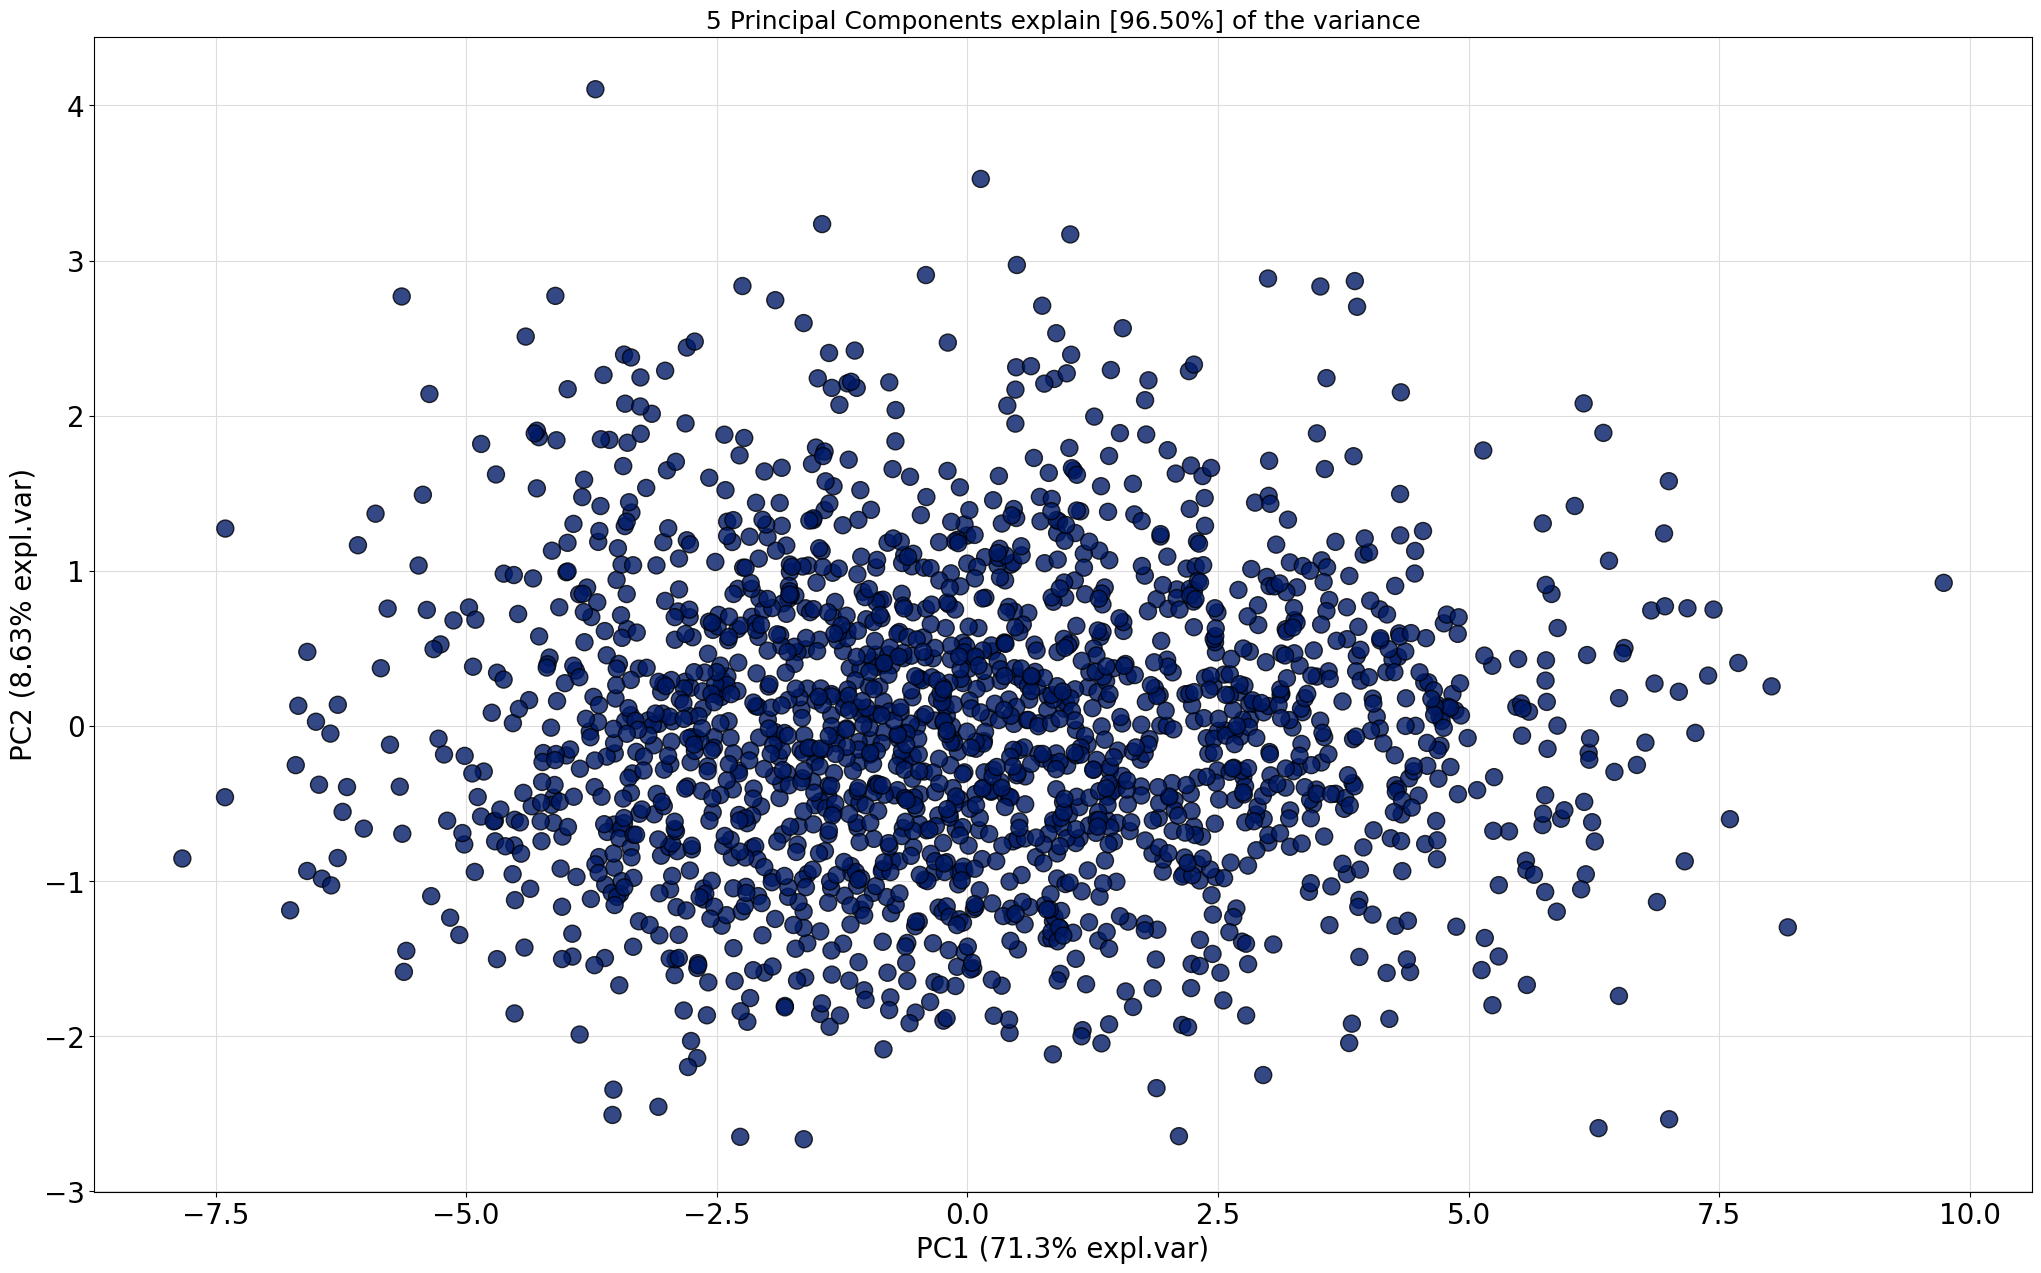

In [22]:
model.scatter()

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [96.50%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

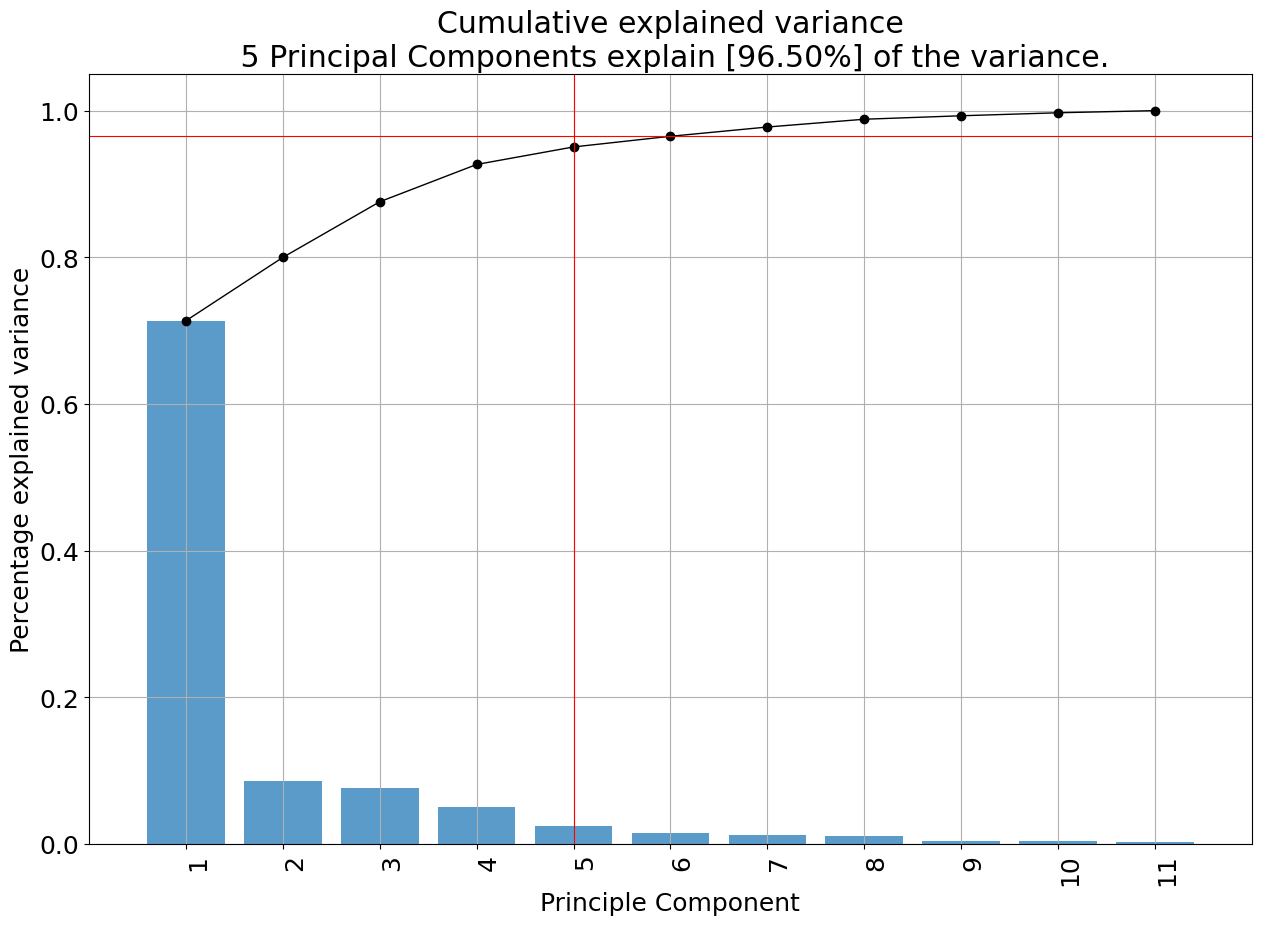

In [23]:
model.plot()

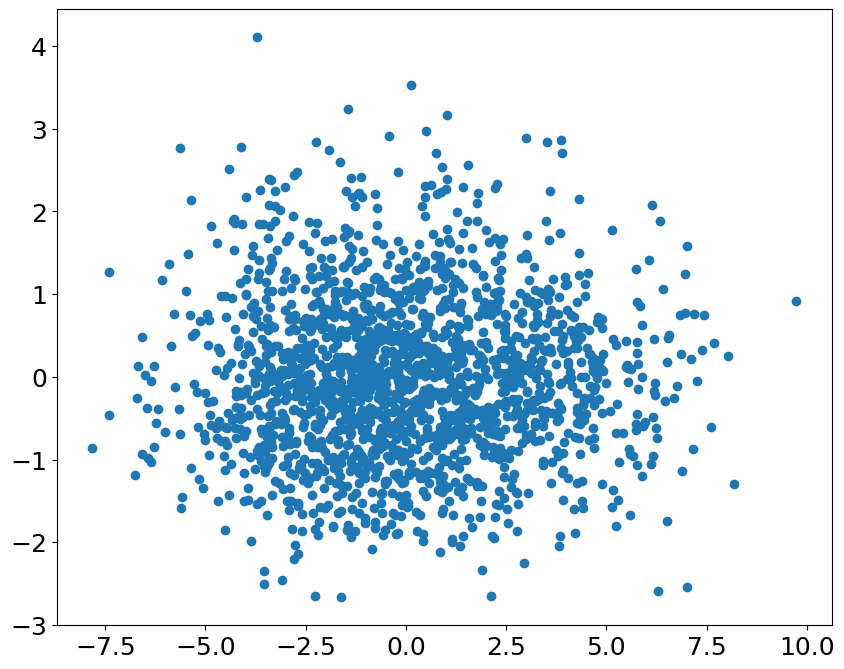

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(x=results_cigday['PC']['PC1'],y=results_cigday['PC']['PC2'])

In [25]:
results_cigday

{'loadings':      active_inactive_ratio_all_days  day10_active_inactive_ratio  \
 PC1                        0.268556                     0.283868   
 PC2                        0.573899                     0.172886   
 PC3                       -0.004443                     0.532123   
 PC4                        0.258494                    -0.268339   
 PC5                        0.253747                     0.200559   
 
      day10_activelick  total_activelick_10days  \
 PC1          0.323706                 0.294211   
 PC2         -0.144176                 0.371916   
 PC3          0.150638                -0.419615   
 PC4         -0.421123                -0.161497   
 PC5          0.153693                -0.103462   
 
      last_three_days_infusion_total  day10_infusion  \
 PC1                        0.315453        0.305329   
 PC2                       -0.292258       -0.269177   
 PC3                       -0.152355        0.027536   
 PC4                        0.302898    

(array([ 18.,  64., 267., 406., 435., 312., 215.,  85.,  27.,   3.]),
 array([-7.83113775, -6.07399914, -4.31686052, -2.55972191, -0.80258329,
         0.95455532,  2.71169394,  4.46883255,  6.22597117,  7.98310978,
         9.7402484 ]),
 <BarContainer object of 10 artists>)

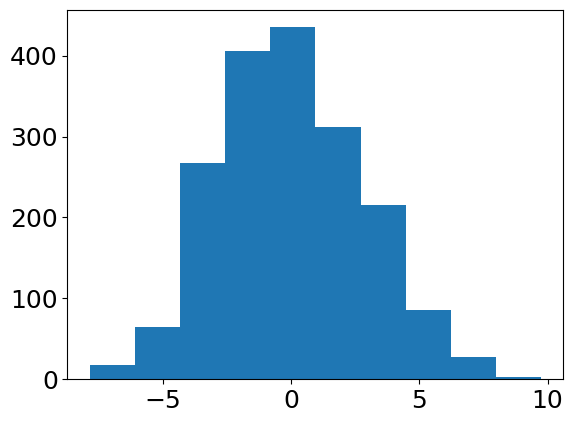

In [26]:
plt.hist(results_cigday['PC']['PC1'])

In [27]:
results_cigday

{'loadings':      active_inactive_ratio_all_days  day10_active_inactive_ratio  \
 PC1                        0.268556                     0.283868   
 PC2                        0.573899                     0.172886   
 PC3                       -0.004443                     0.532123   
 PC4                        0.258494                    -0.268339   
 PC5                        0.253747                     0.200559   
 
      day10_activelick  total_activelick_10days  \
 PC1          0.323706                 0.294211   
 PC2         -0.144176                 0.371916   
 PC3          0.150638                -0.419615   
 PC4         -0.421123                -0.161497   
 PC5          0.153693                -0.103462   
 
      last_three_days_infusion_total  day10_infusion  \
 PC1                        0.315453        0.305329   
 PC2                       -0.292258       -0.269177   
 PC3                       -0.152355        0.027536   
 PC4                        0.302898    

In [28]:
df['PC1']=results_cigday['PC']['PC1']

/tmp/ipykernel_2977687/3131937238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC1']=results_cigday['PC']['PC1']


In [29]:
len(results_cigday['PC'])

1832

In [30]:
len(tbl_cigday)

2018

# export pcs

In [31]:
phenopath='nicsa_gwas/data/pheno/'

## export smkinit subset and PCs

In [32]:
len(results_smkinit['PC'])==len(tbl_smkinit.dropna(axis='rows'))

True

In [33]:
output_smkinit=tbl_smkinit.dropna(axis='rows')

In [34]:
output_smkinit.insert(1, "FAMILY", list(output_smkinit['RFID']), True)
output_smkinit.insert(2, "pc1_smkinit", list(results_smkinit['PC']['PC1']), True)

In [35]:
output_smkinit

RFID      FAMILY  PC1_smkinit  first_three_days_infusion_median  \
0     00077E6638  00077E6638     4.008589                          0.709242   
1     00077E66E0  00077E66E0     2.900209                         -0.677615   
2     00077E6705  00077E6705     1.102695                          0.579132   
3     00077E6708  00077E6708     1.184818                          0.580603   
4     00077E679B  00077E679B     0.525417                         -0.143478   
...          ...         ...          ...                               ...   
2013  DD1DCD24F0  DD1DCD24F0    -1.498099                         -0.144734   
2014  DD1DCD24FC  DD1DCD24FC    -1.373537                          0.104633   
2015  DD1DCD2503  DD1DCD2503    -0.628910                          0.388805   
2016  DD1DCD250A  DD1DCD250A    -0.179870                          0.390146   
2017  DD1DCD250D  DD1DCD250D    -0.222483                          0.574727   

      first_three_days_infusion_total  day1_activelick  \
0                            1.057589         1.795559   
1                            0.897429         2.654089   
2                            0.363547         0.522400   
3                            0.502727         0.073571   
4                           -0.045331         0.466087   
...                               ...              ...   
2013                        -0.921840        -0.797006   
2014                        -0.184160        -1.265296   
2015                        -0.046574        -0.328485   
2016                         0.362221        -0.538174   
2017                        -0.182897        -0.638939   

      day1_active_inactive_ratio  active_inactive_ratio_first_three_median  \
0                       1.117912                                  2.214820   
1                       2.484303                                 -0.761753   
2                       0.203503                                  0.233888   
3                       0.338618                                  0.345396   
4                       0.382693                                  0.329609   
...                          ...                                       ...   
2013                    0.161509                                  0.204608   
2014                   -0.579641                                 -0.510335   
2015                   -0.914490                                 -0.807402   
2016                   -0.893774                                 -0.330921   
2017                    0.093368                                  0.151573   

      first_three_days_activelick_median  first_three_days_activelick_total  \
0                               1.490929                           1.630380   
1                              -0.264925                           1.964005   
2                               0.496765                           0.334517   
3                               0.883120                           0.652442   
4                               0.158019                           0.135115   
...                                  ...                                ...   
2013                           -0.441215                          -0.916158   
2014                           -0.470198                          -0.125098   
2015                            0.206085                          -0.157704   
2016                            0.262349                           0.300567   
2017                           -0.025504                          -0.162734   

      day1_infusion  
0          1.349968  
1          2.045803  
2          0.325367  
3         -0.141948  
4          0.326682  
...             ...  
2013      -1.027200  
2014      -0.951947  
2015      -0.402630  
2016      -0.401279  
2017      -0.351768  

[1997 rows x 11 columns]

In [36]:
for r in output_smkinit.columns[2:]:
    df_out=output_smkinit[['FAMILY','RFID',r]]
    print(df_out.head())
    p=phenopath+'regressedlr_nicsa_subsmkinit_'+r+'.txt'
    print(p)
    df_out.to_csv(p, sep=' ',header=None)

       FAMILY        RFID  PC1_smkinit
0  00077E6638  00077E6638     4.008589
1  00077E66E0  00077E66E0     2.900209
2  00077E6705  00077E6705     1.102695
3  00077E6708  00077E6708     1.184818
4  00077E679B  00077E679B     0.525417
nicsa_gwas/data/pheno/regressedlr_nicsa_subsmkinit_PC1_smkinit.txt
       FAMILY        RFID  first_three_days_infusion_median
0  00077E6638  00077E6638                          0.709242
1  00077E66E0  00077E66E0                         -0.677615
2  00077E6705  00077E6705                          0.579132
3  00077E6708  00077E6708                          0.580603
4  00077E679B  00077E679B                         -0.143478
nicsa_gwas/data/pheno/regressedlr_nicsa_subsmkinit_first_three_days_infusion_median.txt
       FAMILY        RFID  first_three_days_infusion_total
0  00077E6638  00077E6638                         1.057589
1  00077E66E0  00077E66E0                         0.897429
2  00077E6705  00077E6705                         0.363547
3  00077E6708  

## export cigday subset and PCs

In [37]:
len(results_cigday['PC'])==len(tbl_cigday.dropna(axis='rows'))

True

In [38]:
output_cigday=tbl_cigday.dropna(axis='rows')

In [39]:
output_cigday.insert(1, "FAMILY", list(output_cigday['RFID']), True)
output_cigday.insert(2, "pc1_cigday", list(results_cigday['PC']['PC1']), True)

In [40]:
output_cigday

RFID      FAMILY  PC1_cigday  active_inactive_ratio_all_days  \
1     00077E66E0  00077E66E0    0.486831                        1.129840   
3     00077E6708  00077E6708    2.832655                        1.400158   
4     00077E679B  00077E679B    0.863313                       -0.341090   
5     00077E68B2  00077E68B2    1.806852                        1.772718   
6     00077E7584  00077E7584    1.729983                        0.954616   
...          ...         ...         ...                             ...   
2010  DD1DCD24E2  DD1DCD24E2    0.950166                       -0.118844   
2011  DD1DCD24E4  DD1DCD24E4    0.153387                       -0.478919   
2014  DD1DCD24FC  DD1DCD24FC    3.169492                        1.044647   
2015  DD1DCD2503  DD1DCD2503   -0.831816                       -0.954616   
2017  DD1DCD250D  DD1DCD250D   -1.749423                       -0.131357   

      day10_active_inactive_ratio  day10_activelick  total_activelick_10days  \
1                        0.804694         -0.194590                 0.948758   
3                        0.450453          0.755632                 1.345989   
4                        0.265566          0.587477                 0.051546   
5                        0.071891         -0.550731                 1.441020   
6                       -0.031556         -0.193263                 0.400946   
...                           ...               ...                      ...   
2010                     0.871460          0.528139                -0.005587   
2011                     1.069268         -0.370984                 0.162734   
2014                     0.720293          0.930315                 1.156083   
2015                     0.019469          0.417430                -0.452627   
2017                    -0.540024         -0.781879                 0.092625   

      last_three_days_infusion_total  day10_infusion  \
1                          -0.764155       -0.089922   
3                           0.523973        0.690094   
4                           0.067715        0.691746   
5                           0.637158       -1.065600   
6                           1.070712       -0.088616   
...                              ...             ...   
2010                        0.066470       -0.092536   
2011                       -0.251553       -0.352027   
2014                        0.731316        0.752562   
2015                       -0.250271        0.688444   
2017                       -0.765819       -1.067899   

      last_three_days_activelick_median  last_three_days_infusion_median  \
1                             -0.365722                        -0.413286   
3                              0.753322                         0.708891   
4                              0.470230                         0.689590   
5                              0.089552                         0.445053   
6                              0.676864                         1.586779   
...                                 ...                              ...   
2010                           0.720273                        -0.427045   
2011                          -0.400970                         0.028975   
2014                           1.176999                         0.906211   
2015                          -0.782074                         0.030235   
2017                          -0.876231                        -0.425665   

      active_inactive_ratio_last_three_median  total_infusion_10days  \
1                                    0.879200               0.729694   
3                                    0.767390               1.237373   
4                                   -0.135963               0.290192   
5                                    1.623129               1.066317   
6                                    0.763945              -0.327960   
...                                       ...                    ...   
2010                                 0.943424   

In [41]:
for r in output_cigday.columns[2:]:
    df_out=output_cigday[['FAMILY','RFID',r]]
    print(df_out.head())
    p=phenopath+'regressedlr_nicsa_subcigday_'+r+'.txt'
    print(p)
    df_out.to_csv(p, sep=' ',header=None)

       FAMILY        RFID  PC1_cigday
1  00077E66E0  00077E66E0    0.486831
3  00077E6708  00077E6708    2.832655
4  00077E679B  00077E679B    0.863313
5  00077E68B2  00077E68B2    1.806852
6  00077E7584  00077E7584    1.729983
nicsa_gwas/data/pheno/regressedlr_nicsa_subcigday_PC1_cigday.txt
       FAMILY        RFID  active_inactive_ratio_all_days
1  00077E66E0  00077E66E0                        1.129840
3  00077E6708  00077E6708                        1.400158
4  00077E679B  00077E679B                       -0.341090
5  00077E68B2  00077E68B2                        1.772718
6  00077E7584  00077E7584                        0.954616
nicsa_gwas/data/pheno/regressedlr_nicsa_subcigday_active_inactive_ratio_all_days.txt
       FAMILY        RFID  day10_active_inactive_ratio
1  00077E66E0  00077E66E0                     0.804694
3  00077E6708  00077E6708                     0.450453
4  00077E679B  00077E679B                     0.265566
5  00077E68B2  00077E68B2                     0.071891

# PCA all nicsa pheno

In [30]:
pheno=pheno.drop(0,axis=1)

In [31]:
df=pheno.dropna(axis='rows')

In [32]:
labels=list(df.columns[df.columns!=(1)])
x = df.loc[:, labels].values
y = df.loc[:,[1]].values

In [33]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_allpheno= model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [63] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [26] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [63] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[26]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '26 Principal Components explain [95.64%] of the variance'}, xlabel='PC1 (31.6% expl.var)', ylabel='PC2 (11.0% expl.var)'>)

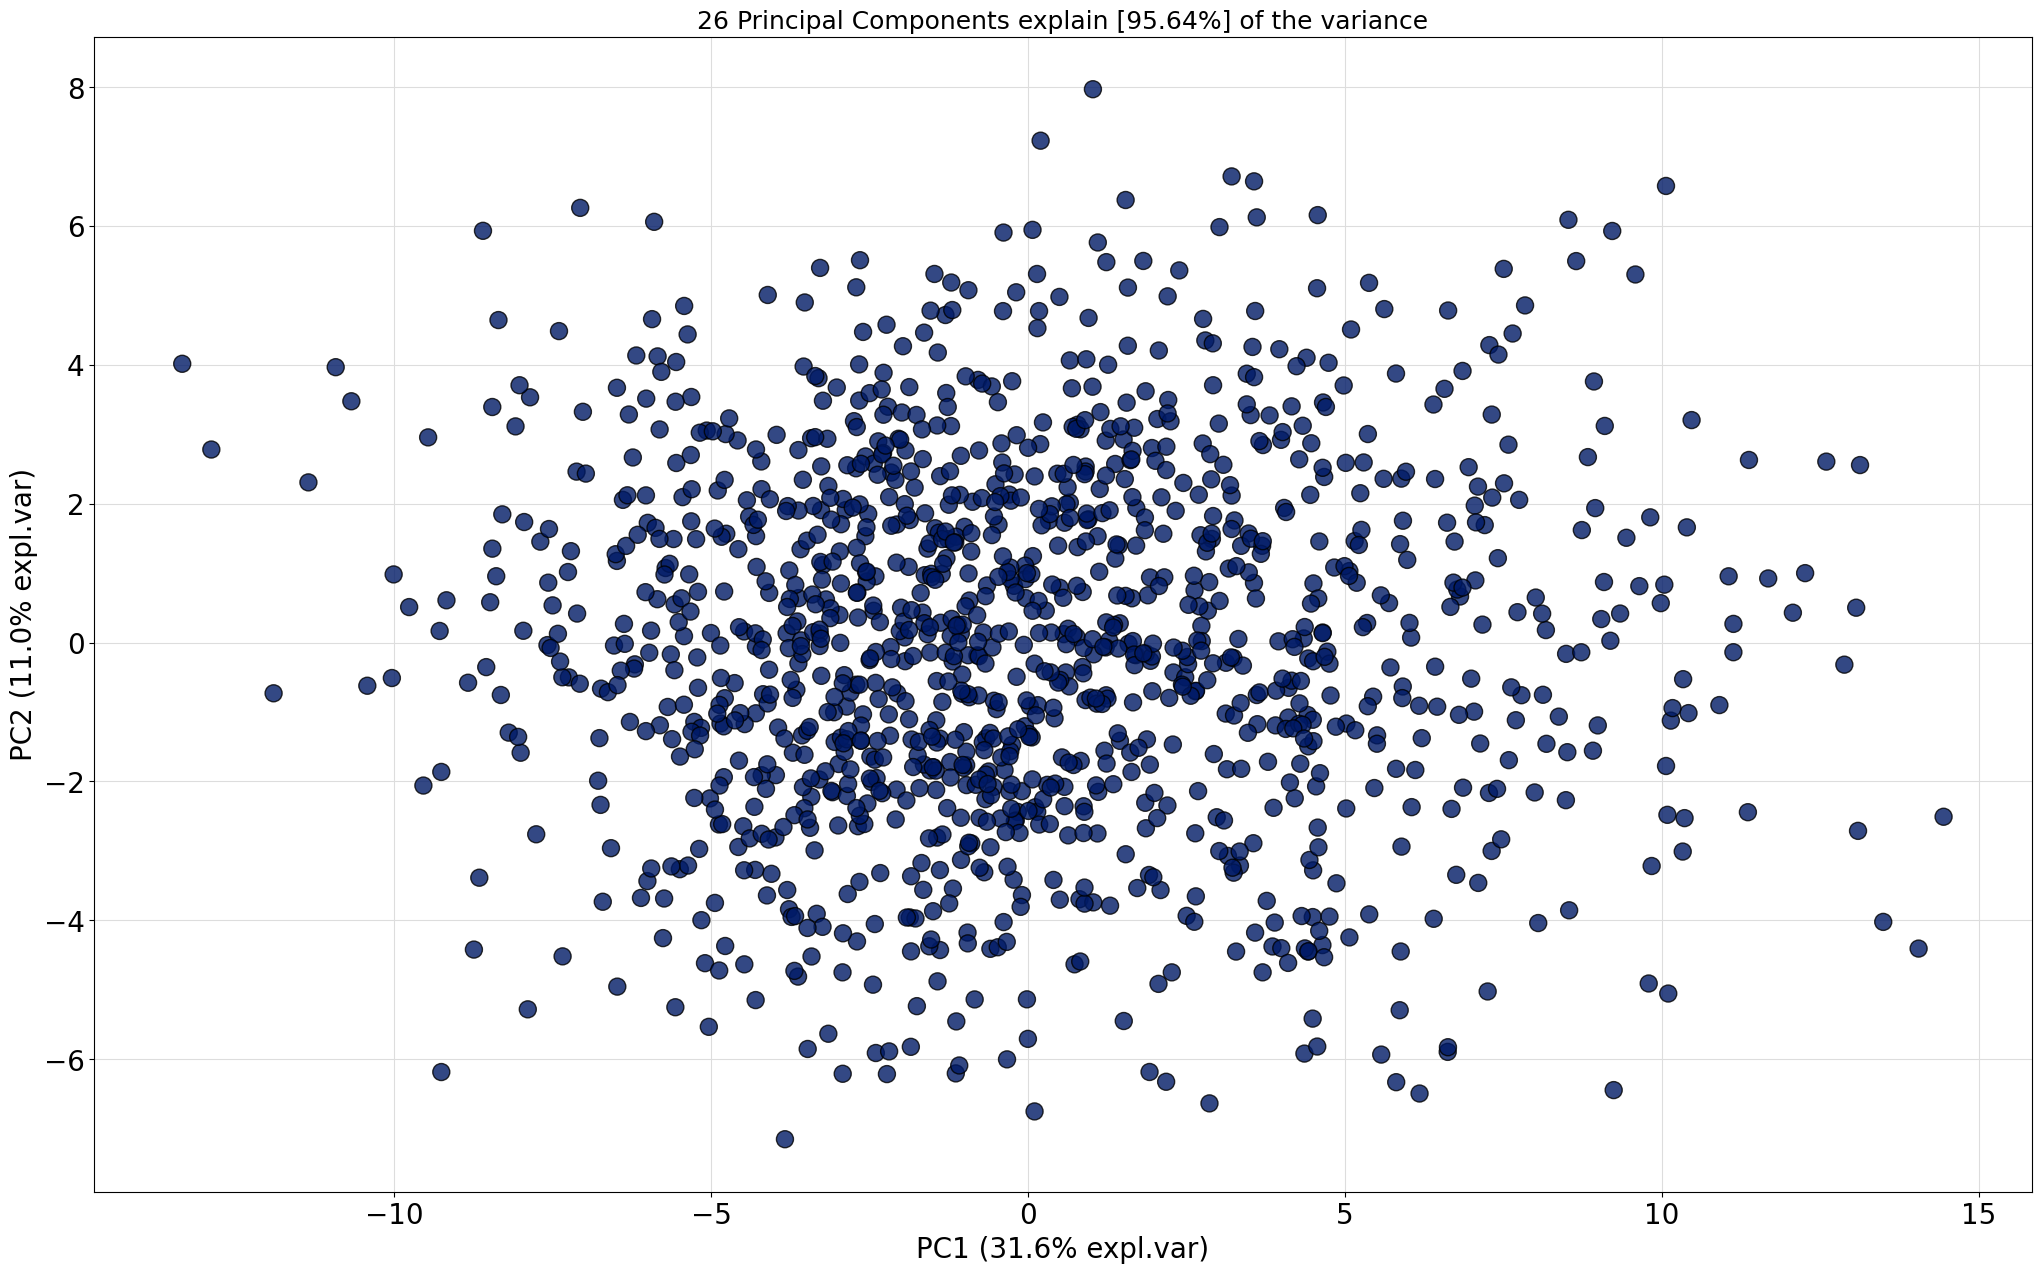

In [34]:
model.scatter()

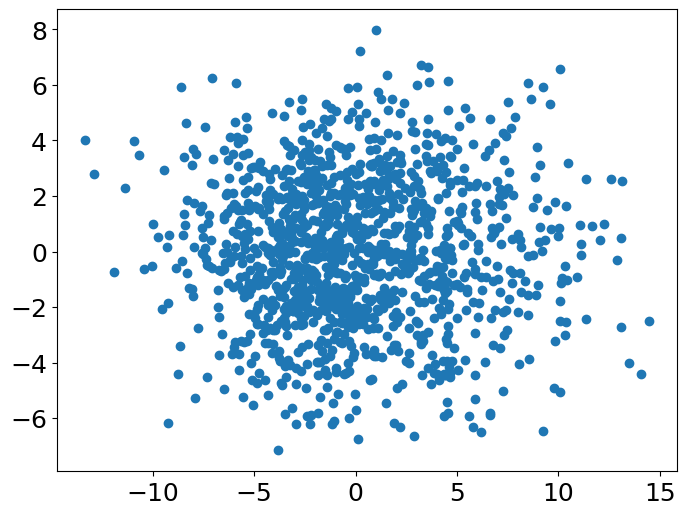

In [35]:
#confirm plot matches outputted data
plt.figure(figsize=(8,6))
plt.scatter(x=results_allpheno['PC']['PC1'],y=results_allpheno['PC']['PC2'])

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 26 Principal Components explain [95.64%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

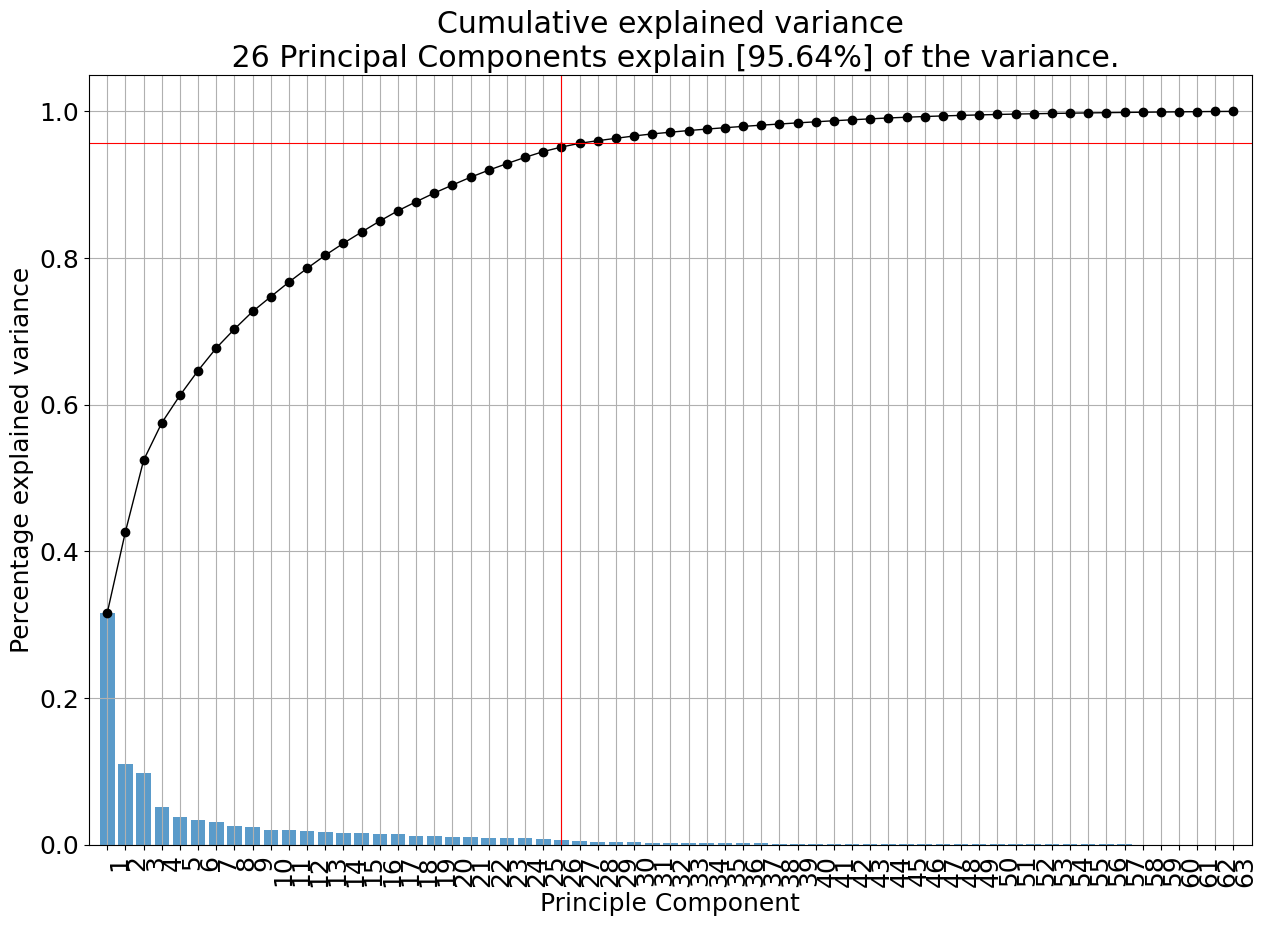

In [36]:
model.plot()

# PCA all cigday+smkinit

In [76]:
df=tbl_cigday.merge(tbl_smkinit, on='RFID').dropna(axis='rows')

In [77]:
labels=list(df.columns[df.columns!=('RFID')])
x = df.loc[:, labels].values
y = df.loc[:,['RFID']].values

In [78]:
del(model)

In [79]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_allpheno= model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [19] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [96.41%] of the variance'}, xlabel='PC1 (52.8% expl.var)', ylabel='PC2 (20.2% expl.var)'>)

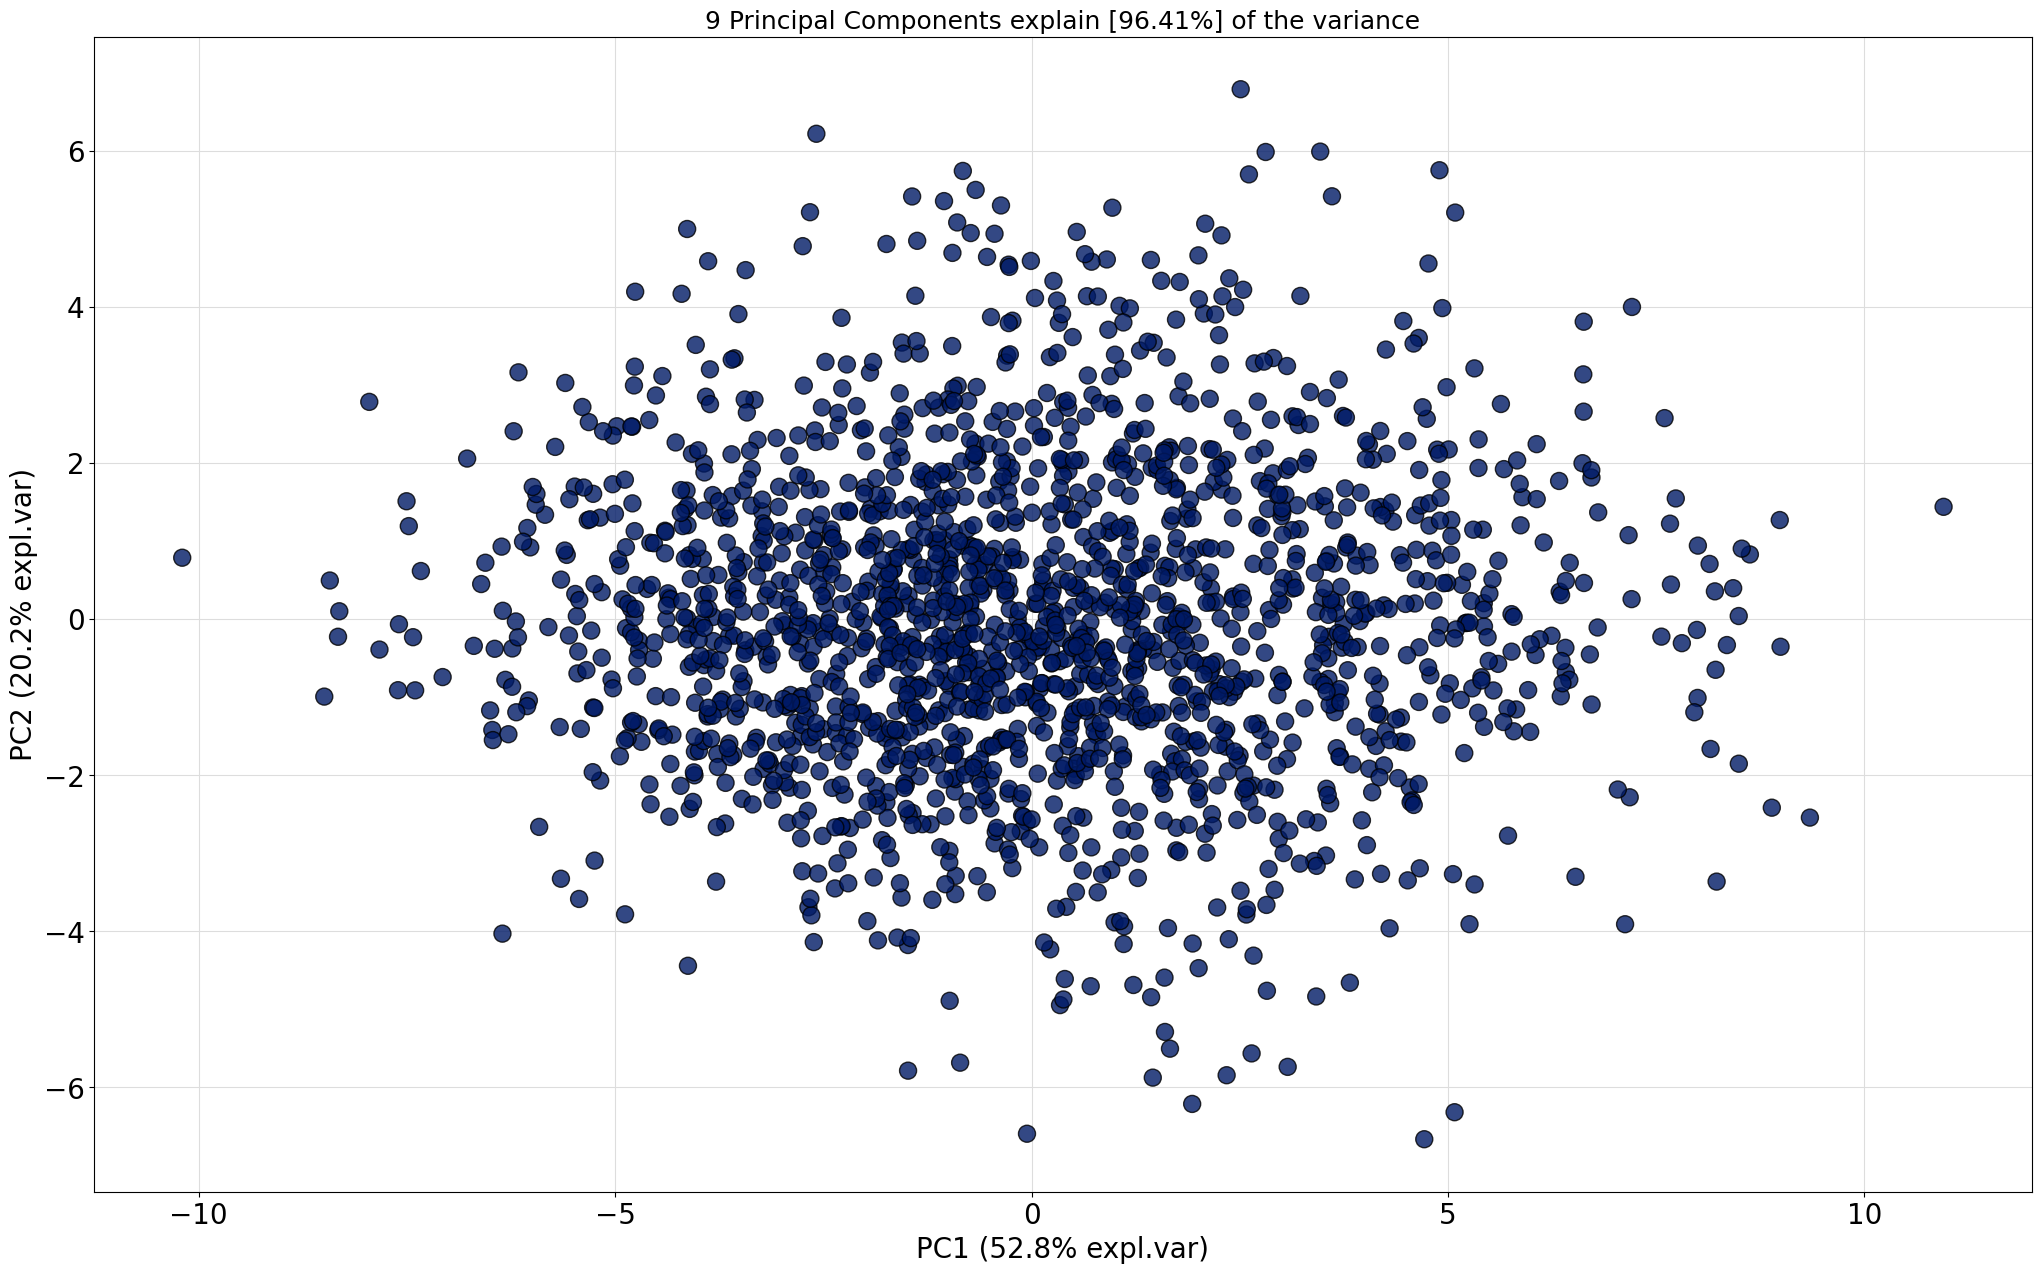

In [80]:
model.scatter()

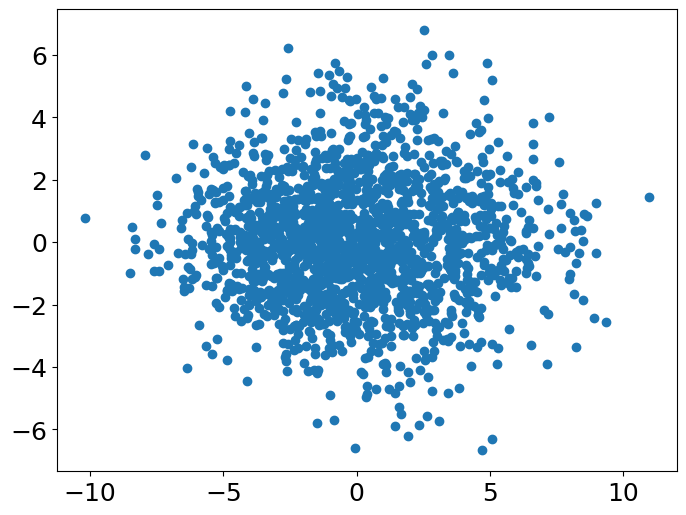

In [81]:
#confirm plot matches outputted data
plt.figure(figsize=(8,6))
plt.scatter(x=results_allpheno['PC']['PC1'],y=results_allpheno['PC']['PC2'])

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 10 Principal Components explain [96.59%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

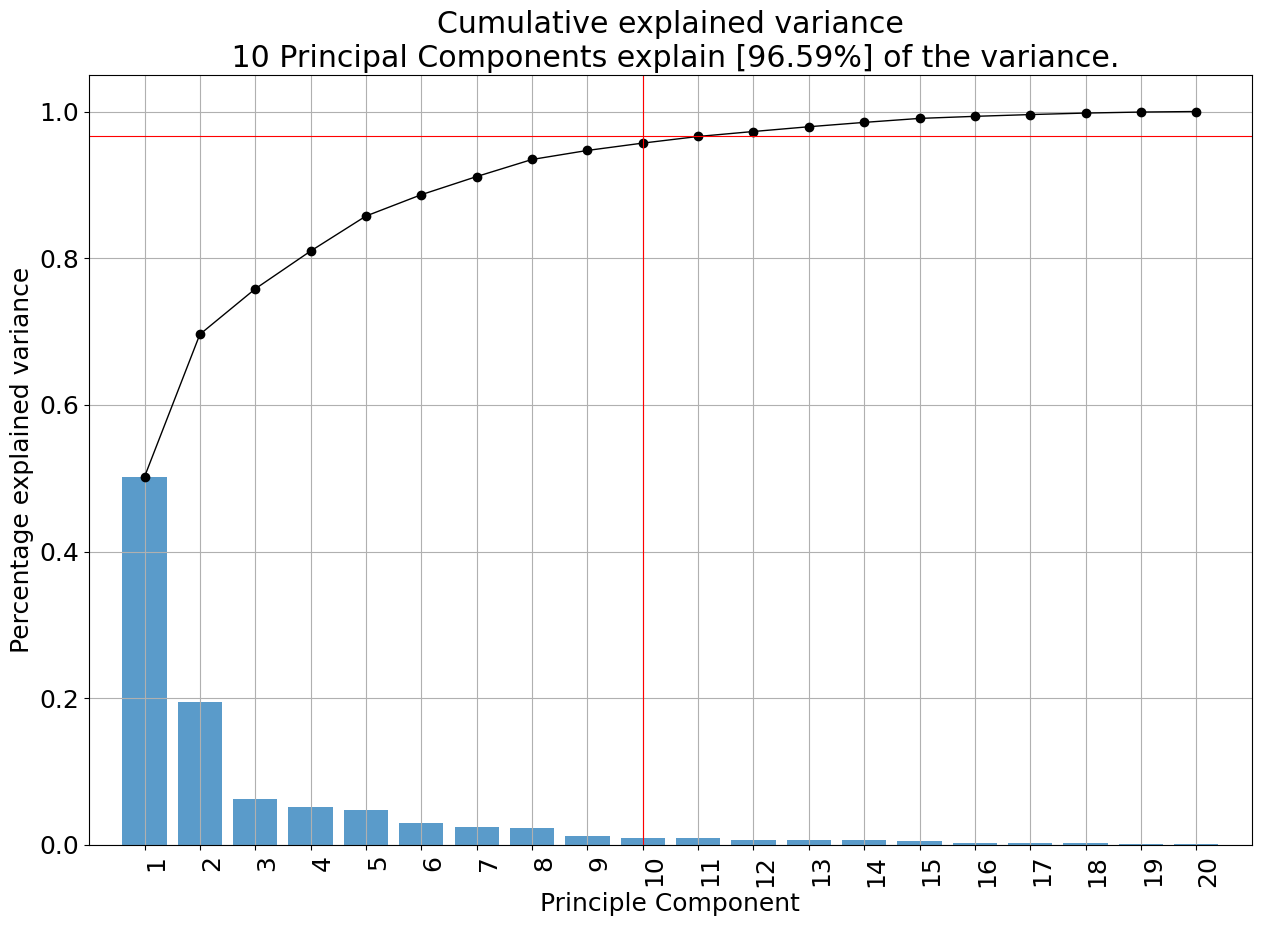

In [43]:
model.plot()

In [44]:
results_cigday

{'loadings':      active_inactive_ratio_all_days  day10_active_inactive_ratio  \
 PC1                        0.268556                     0.283868   
 PC2                        0.573899                     0.172886   
 PC3                       -0.004443                     0.532123   
 PC4                        0.258494                    -0.268339   
 PC5                        0.253747                     0.200559   
 
      day10_activelick  total_activelick_10days  \
 PC1          0.323706                 0.294211   
 PC2         -0.144176                 0.371916   
 PC3          0.150638                -0.419615   
 PC4         -0.421123                -0.161497   
 PC5          0.153693                -0.103462   
 
      last_three_days_infusion_total  day10_infusion  \
 PC1                        0.315453        0.305329   
 PC2                       -0.292258       -0.269177   
 PC3                       -0.152355        0.027536   
 PC4                        0.302898    